In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
iris_df = pd.read_csv('iris.csv', skiprows=1,
                      names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
iris_df.head()


,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,2.5,5.8,1.8,Iris-virginica
1,5.6,2.9,3.6,1.3,Iris-versicolor
2,5.0,3.4,1.5,0.2,Iris-setosa
3,4.6,3.4,1.4,0.3,Iris-setosa
4,5.6,2.5,3.9,1.1,Iris-versicolor


In [55]:
from sklearn import preprocessing

In [56]:
label_encoder = preprocessing.LabelEncoder()
iris_df['class'] = label_encoder.fit_transform(iris_df['class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,2.5,5.8,1.8,2
1,5.6,2.9,3.6,1.3,1
2,5.0,3.4,1.5,0.2,0
3,4.6,3.4,1.4,0.3,0
4,5.6,2.5,3.9,1.1,1


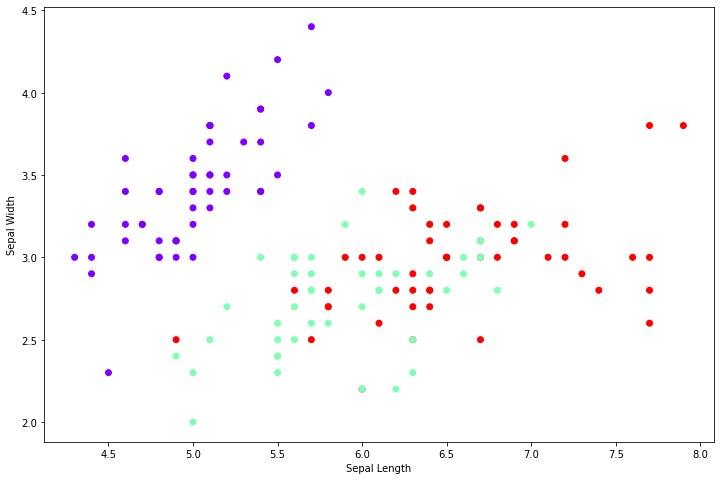

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], c=iris_df['class'], cmap='rainbow')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

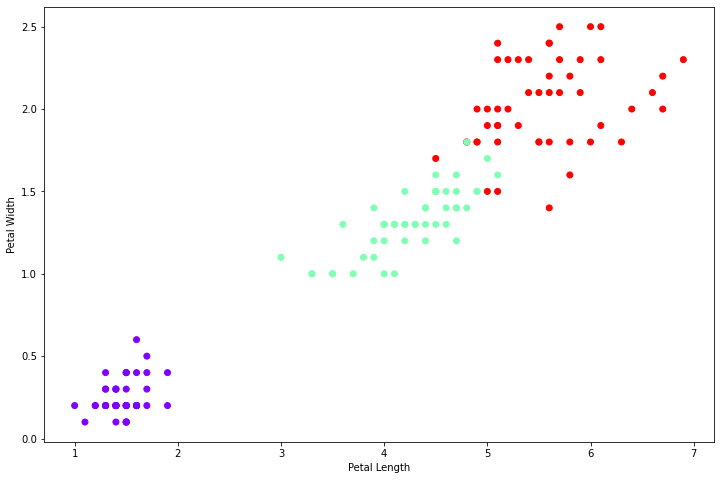

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['petal-length'], iris_df['petal-width'], c=iris_df['class'], cmap='rainbow')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

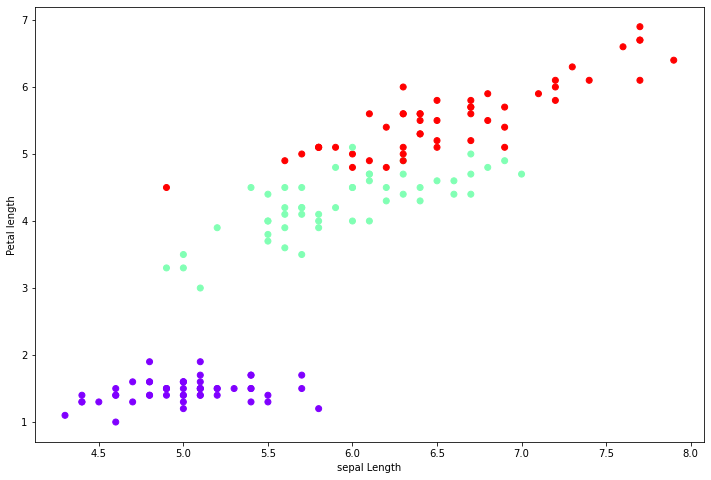

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], cmap='rainbow')

plt.xlabel('sepal Length')
plt.ylabel('Petal length')

plt.show()

In [60]:
iris_2d = iris_df[['sepal-length', 'petal-length']]

In [61]:
iris_2d = np.array(iris_2d)

In [62]:
kmeans_model_2d = KMeans(n_clusters=3, max_iter=1000).fit(iris_2d)

In [63]:
kmeans_model_2d.labels_

array([0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1])

In [64]:
centeroids_2d = kmeans_model_2d.cluster_centers_
centeroids_2d

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

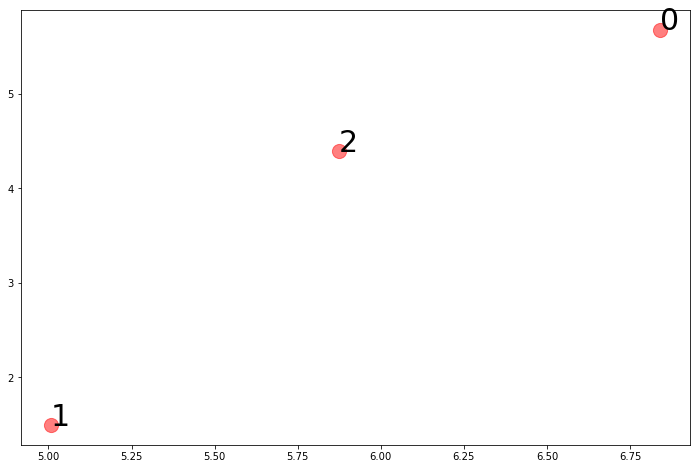

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(centeroids_2d[:, 0], centeroids_2d[:, 1], c='r', s=200, alpha=0.5)
for i in range(len(centeroids_2d)):
    plt.annotate(i, (centeroids_2d[i, 0], centeroids_2d[i, 1]), fontsize = 30)

In [66]:
iris_labels = iris_df['class']

In [67]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_labels, kmeans_model_2d.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris_labels, kmeans_model_2d.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_labels, kmeans_model_2d.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(iris_labels, kmeans_model_2d.labels_))
print("Adjusted Mutual Info: %.3f" % metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2d.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(iris_2d, kmeans_model_2d.labels_, metric='euclidean'))

Homogeneity: 0.703
Completeness: 0.710
V-measure: 0.706
Adjusted Rand-Index: 0.699
Adjusted Mutual Info: 0.703
Silhouette Coefficient: 0.589


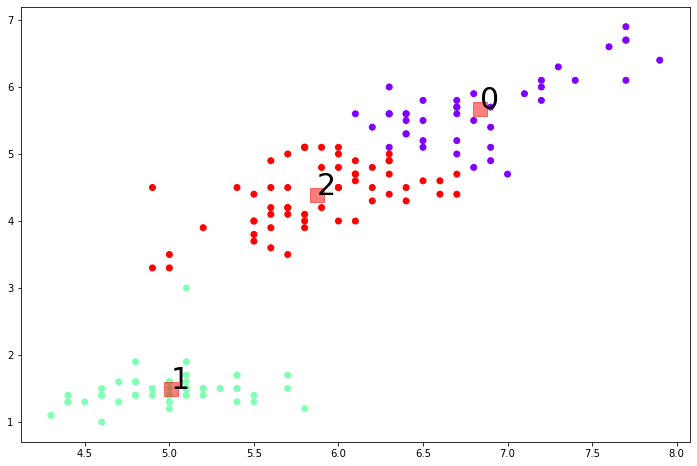

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=kmeans_model_2d.labels_, cmap='rainbow')
plt.scatter(centeroids_2d[:, 0], centeroids_2d[:, 1], c='r', s=200, alpha=0.5, marker='s')
for i in range(len(centeroids_2d)):
    plt.annotate(i, (centeroids_2d[i, 0], centeroids_2d[i, 1]), fontsize = 30)
    


In [69]:
iris_features = iris_df.drop('class', axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.7,2.5,5.8,1.8
1,5.6,2.9,3.6,1.3
2,5.0,3.4,1.5,0.2
3,4.6,3.4,1.4,0.3
4,5.6,2.5,3.9,1.1


In [70]:
iris_labels = iris_df['class']
iris_labels.head()

0    2
1    1
2    0
3    0
4    1
Name: class, dtype: int32

In [71]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(iris_features)

In [72]:
kmeans_model_2d.labels_

array([0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1])

In [73]:
kmeans_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [74]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted Mutual Info: %.3f" % metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(iris_features, kmeans_model.labels_, metric='euclidean'))

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Adjusted Rand-Index: 0.730
Adjusted Mutual Info: 0.755
Silhouette Coefficient: 0.553
